<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# K-Means Clustering

In [13]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from os.path import exists

path = Path('')

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'foodconsumption.csv':'https://storage.googleapis.com/aipi_datasets/foodconsumption.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

## Clustering European Countries based on Food Consumption

In [14]:
# Read in the data

filepath = path/'foodconsumption.csv'
if exists(filepath):
    foods = pd.read_csv(filepath)
foods.set_index(keys='Country',inplace=True)
foods = foods.dropna(axis=0)

print(foods.shape)
foods

(13, 20)


,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Country,,,,,,,,,,,,,,,,,,,,
Germany,90,49,88,19.0,57.0,51,19,21,27,21,81,75,44,71,22,91,85,74,30.0,26
Italy,82,10,60,2.0,55.0,41,3,2,4,2,67,71,9,46,80,66,24,94,5.0,18
France,88,42,63,4.0,76.0,53,11,23,11,5,87,84,40,45,88,94,47,36,57.0,3
Holland,96,62,98,32.0,62.0,67,43,7,14,14,83,89,61,81,15,31,97,13,53.0,15
Belgium,94,38,48,11.0,74.0,37,23,9,13,12,76,76,42,57,29,84,80,83,20.0,5
Luxembourg,97,61,86,28.0,79.0,73,12,7,26,23,85,94,83,20,91,94,94,84,31.0,24
England,27,86,99,22.0,91.0,55,76,17,20,24,76,68,89,91,11,95,94,57,11.0,28
Portugal,72,26,77,2.0,22.0,34,1,5,20,3,22,51,8,16,89,65,78,92,6.0,9
Austria,55,31,61,15.0,29.0,33,1,5,15,11,49,42,14,41,51,51,72,28,13.0,11


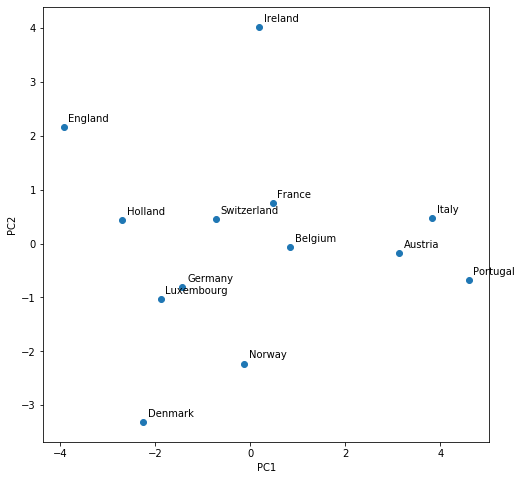

In [15]:
# Standardize each feature

# Calculate mean and stdev
u = foods.mean(axis=0)
stdev = foods.std(axis=0)

# Calculate the standardized data
foods_standard = (foods-u) / stdev

# PCA on the standardized data
pca = PCA(2).fit(foods_standard)

# Project the data onto the new principal components axes
projected = pca.transform(foods_standard)

# Plot the data on the new principal components axes
fig2,ax2 = plt.subplots(figsize=(8,8))
ax2.scatter(x=projected[:,0],y=projected[:,1])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
for i,country in enumerate(list(foods_standard.index.values)):
    ax2.annotate(country,xy=(projected[i,0]+0.1,projected[i,1]+0.1))
plt.show()

### Cluster countries by food consumption

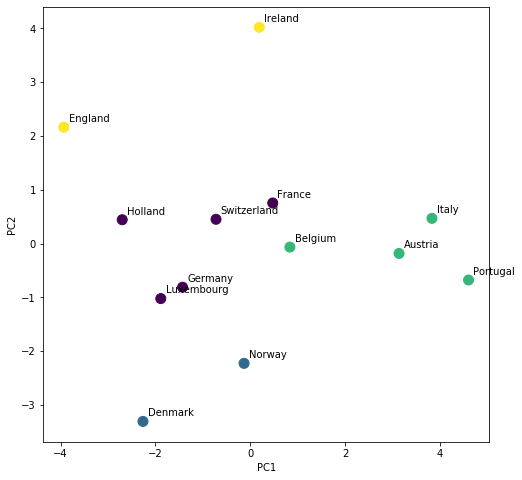

In [16]:
# Use K-Means clustering to group the countries based on similar food consumption patterns

k = 4 # Use 4 clusters
kmeans_model = KMeans(n_clusters=k, random_state=1)
kmeans_model.fit(foods_standard)
# Get the cluster labels for each point
cluster_labels = kmeans_model.predict(foods_standard)

# Plot the data on the PCA axes, coloring each point according to cluster label
fig2,ax2 = plt.subplots(figsize=(8,8))
ax2.scatter(x=projected[:,0],y=projected[:,1], c=cluster_labels, s=100)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
for i,country in enumerate(list(foods_standard.index.values)):
    ax2.annotate(country,xy=(projected[i,0]+0.1,projected[i,1]+0.1))
plt.show()

## Clustering digits

<Figure size 432x288 with 0 Axes>

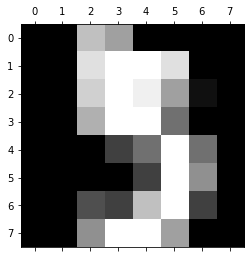

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

# Display one of the digits
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show() 

### Cluster the digits using K-Means

In [18]:
# Cluster the digits
k = 10 # 10 digits
kmeans_model = KMeans(n_clusters=k, random_state=1)
kmeans_model.fit(digits.data)

# Get the cluster labels
cluster_labels = kmeans_model.predict(digits.data) 

# Get locations of the cluster centers
centers = kmeans_model.cluster_centers_

### Visualize our clusters using PCA to select 2 dimensions for visualization

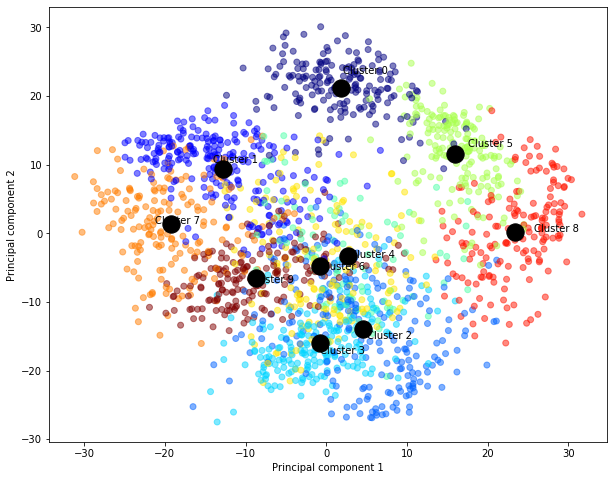

In [19]:
# Use PCA to reduce dimensions/features from 64 to 2 for visualization
pca = PCA(2)  
pca.fit(digits.data)

# Transform our digits data to PCA dimensions
transformed = pca.transform(digits.data)

# Transform cluster centers to PCA dimensions
transformed_centers = pca.transform(centers)

# Plot the transformed data on the two principal dimensions.  Color points by cluster label
fig = plt.figure(figsize=(10,8))
plt.scatter(transformed[:, 0], transformed[:, 1],
            c=cluster_labels, alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))

# Plot the cluster centers
plt.scatter(transformed_centers[:, 0], transformed_centers[:, 1], c='black', s=300, alpha=1)
for i in range(centers.shape[0]):
    plt.annotate('Cluster '+str(i),xy=(transformed_centers[i, 0]*1.1, transformed_centers[i, 1]*1.1))
    
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

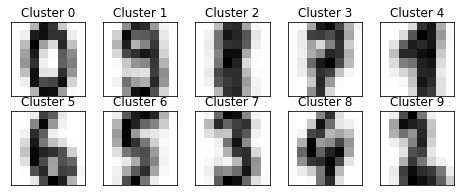

In [20]:
# Visualize each cluster center (all 64 dimensions, reshaped into 8x8) as an image
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans_model.cluster_centers_.reshape(10, 8, 8)
for i, (axi, center) in enumerate(zip(ax.flat, centers)):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    axi.set_title('Cluster {}'.format(i))